# Understanding Descriptive Statistics

Import the necessary libraries here:

In [7]:
# Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [9]:
# your code here

def rolling():
    die_sides = [1,2,3,4,5,6]
    die_rolls = [random.choice(die_sides) for rolls in range(10)]
    return die_rolls
    
ten_rolls = rolling()
print(ten_rolls)

[4, 3, 1, 2, 6, 4, 1, 3, 3, 6]


#### 2.- Plot the results sorted by value.

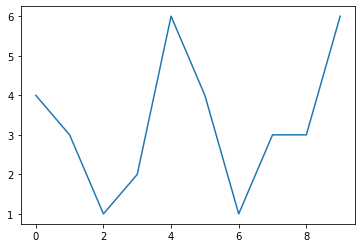

In [10]:
# your code here
plt.plot(ten_rolls)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([2., 0., 1., 0., 3., 0., 2., 0., 0., 2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

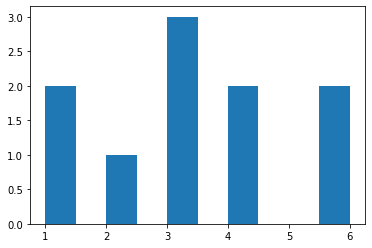

In [11]:
# your code here
plt.hist(ten_rolls)

In [ ]:
"""
the second plot gives us the frequency distribution along the x axis
"""


## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [30]:
# your code here

def mean(lst):
    first_step = sum(lst) // len(lst)
    return first_step

mean(ten_rolls)

3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [18]:
# your code here
def freq(lst):
    distr = {}
    for i in lst:
        if distr.get(i):
            distr[i] += 1
        else:
            distr[i] = 1
    return distr

dist = freq(ten_rolls)
mean(dist)

3

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [21]:
# your code here

def median(lst):
    median = sorted(lst) [len(lst) // 2]
    return median

median(ten_rolls)

3

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
# your code here


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

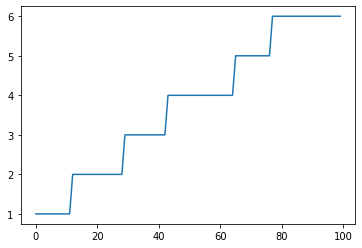

In [42]:
# your code here
hund_rolls = pd.read_csv('../data/roll_the_dice_hundred.csv')
hund_rolls = list(hund_rolls["value"])
hund_rolls.sort()
plt.plot(hund_rolls)

In [ ]:
"""
There's a latter-shaped line, because the values were ordered.
"""


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [31]:
# your code here
mean(hund_rolls)

3

#### 3.- Now, calculate the frequency distribution.


In [32]:
# your code here
freq(hund_rolls)

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

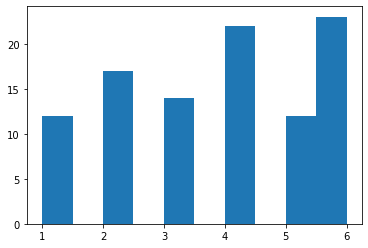

In [43]:
# your code here
plt.hist(hund_rolls)

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([175.,   0., 167.,   0., 175.,   0., 168.,   0., 149., 166.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

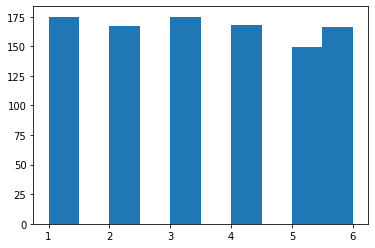

In [53]:
# your code here
thous_rolls = pd.read_csv('../data/roll_the_dice_thousand.csv')
thous_rolls = list(thous_rolls["value"])
plt.hist(thous_rolls)

In [ ]:
"""
The distribution seems more even.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <a list of 10 Patch objects>)

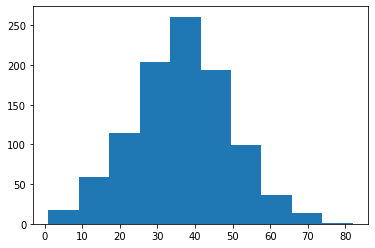

In [52]:
# your code here
pop_ages = pd.read_csv('../data/ages_population.csv')
pop_ages = list(pop_ages["observation"])

plt.hist(pop_ages)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [55]:
# your code here

np.mean(pop_ages)

36.56

In [56]:
np.std(pop_ages)

12.810089773299795

In [ ]:
"""
More or less? The grap is slightly right-skewed, but I thought the mean would be slightly higher.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <a list of 10 Patch objects>)

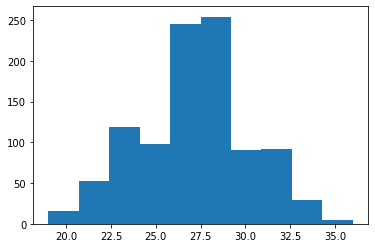

In [57]:
# your code here
pop_ages2 = pd.read_csv('../data/ages_population2.csv')
pop_ages2 = list(pop_ages2["observation"])

plt.hist(pop_ages2)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
It's a lot more symmetrical.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [58]:
# your code here
np.mean(pop_ages2)

27.155

In [59]:
np.std(pop_ages2)

2.9683286543103677

In [ ]:
"""
because the distribution is more symmetrical, the std isa lot lower as well
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <a list of 10 Patch objects>)

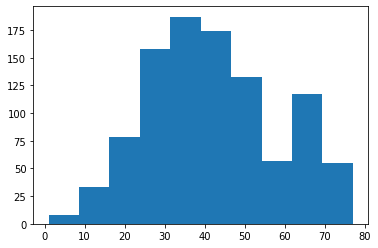

In [60]:
# your code here
pop_ages3 = pd.read_csv('../data/ages_population3.csv')
pop_ages3 = list(pop_ages3["observation"])

plt.hist(pop_ages3)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [61]:
# your code here
np.mean(pop_ages3)

41.989

In [62]:
np.std(pop_ages3)

16.13663158778808

In [ ]:
"""
the std is higher
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [65]:
# your code here
np.percentile(pop_ages3, [25, 50, 75, 100])

array([30., 40., 53., 77.])

In [66]:
np.median(pop_ages3)

40.0

In [ ]:
"""
The median and the mean are in the same quartile, shich means that the distribuition is left-skewed.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [68]:
# your code here
np.percentile(pop_ages3, [30, 50, 80, 90])

array([32., 40., 57., 67.])

In [ ]:
"""
The distribution is clearly to the left?
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""